#### Excercise 1
This is a programming challenge.

Add *pivoting* to the function `gauss_elim` from the lecture notes, by writing a new function called `gauss_elim_pivot`. Try it on the Excercise 2, which should give you whole numbr answers.

In the code for `gauss_elim`, at a point in the code *before* dividing by `A[m:m]`, add the following steps:
- Add a search of the column `m` for the largest value, starting at row `m+1` and working down.
- Keep track of which row you find that maximum value.
- Once you found the maximum value, swicth the row `m` and that row, for both `A` and `b`.
- Proceed as normal.

In [32]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def gauss_elim_pivot(A,b):
    N = b.size
    
    for i in range(N):
        pivots = [np.abs(A[j][i]) for j in range(i,N)]
        pivotMax = np.argmax(pivots) + i
        
        A[[i],:], A[[pivotMax],:] = A[[pivotMax],:], A[[i],:]
        b[i], b[pivotMax] = b[pivotMax], b[i]
    
    for m in range(N):
        div = A[m,m]
        A[m,:] /= div
        b[m] /= div
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            b[i] -= mult*b[m]
   
    x = np.zeros(N,float)
    
    for m in range(N-1,-1,-1): 
        x[m] = b[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
            
    return x

#### Excercise 2

Use your Gaussian elimination program with pivoting to solve the system of linear equations:
$$
\begin{array}{rrrrrrrrc} 
2w & + &  x & + & 4y & + &  z & = & -4\\
3w & + & 4x & - &  y & - &  z & = &  3\\
1w & - & 4x & + &  y & + & 5z & = &  9 \\
2w & - & 2x & + &  y & + & 3z & = &  7 \\
\end{array}
$$
You should get whole numbers for $\vec{x}$.

Try again, with the very first term being $0w$. (You won't get whole number answers, but you should also not get any errors this time.)

In [26]:
A = np.array([   [ 2,  1,  4,  1 ],
                 [ 3,  4, -1, -1 ],
                 [ 1, -4,  1,  5 ],
                 [ 2, -2,  1,  3 ]   ], dtype=float)

b = np.array([ -4, 3, 9, 7 ],dtype=float)

print('the vector is: ' + str(gauss_elim_pivot(A,b)) +'^T')
print('\n')

A = np.array([   [ 0,  1,  4,  1 ],
                 [ 3,  4, -1, -1 ],
                 [ 1, -4,  1,  5 ],
                 [ 2, -2,  1,  3 ]   ], dtype=float)

b = np.array([ -4, 3, 9, 7 ],dtype=float)

print('the vector is: ' + str(gauss_elim_pivot(A,b)) +'^T')

the vector is: [ 2. -1. -2.  1.]^T


the vector is: [ 1.61904762 -0.42857143 -1.23809524  1.38095238]^T


#### Excercise 3

Consider the following  circuit of resistors.

<img src="resistor.png" width=200/>

Al the resistors have the same resistance $R$. The voltage at the top is $V_{+}=5$ V.What are the other voltages $V_1$ to $V_4$?

To answer that question we use Ohm's law ($V=IR$) and the Kirchoff current law, which says that the total overall current flow into (or out of) any junction must be zero. If the voltage across the resistor connecting $V_1$ and $V_2$ is $V_1-V_2$, then the current flowing though it is $(V_1-V_2)/R$. That current is flowing though $V_1$, but that is not all of it. We see that:
$$
\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R}+\frac{V_1-V_+}{R}=0
$$

* In the next notebook cell, write out in $\LaTeX$ all the equations for the four junctions with unknown voltages. Simplify them, then write them in linear and matrix form 

* Write a program to solve the four resulting linear equations for the voltages, using `gauss_elim_pivot`.

* Verify your result with `scipy.linalg.solve`.

You will re-use this matrix in the next several excercises below.

<font color="blue"> **ANSWER:**</font>

$ \textbf{1. }\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R}+\frac{V_1-V_+}{R}=0 \;\, \Rightarrow \; 4\cdot V_1-V_2-V_3-V_4 = 5 $

$ \textbf{2. }\frac{V_2-V_1}{R}+\frac{V_2-V_4}{R}+\frac{V_2-V_⏚}{R}=0 \;\;\;\;\;\;\;\;\;\;\;\;\; \Rightarrow \; -V_1+3\cdot V_2-V_4 = 0$ 

$ \textbf{3. }\frac{V_3-V_1}{R}+\frac{V_3-V_4}{R}+\frac{V_3-V_+}{R}=0 \;\;\;\;\;\;\;\;\;\;\;\;\; \Rightarrow \; -V_1+3\cdot V_3-V_4 = 5$

$ \textbf{4. }\frac{V_4-V_2}{R}+\frac{V_4-V_3}{R}+\frac{V_4-V_1}{R}+\frac{V_4-V_⏚}{R} = 0 \;\; \Rightarrow \; -V_1-V_2-V_3+4\cdot V_4 = 0 $

$  $

$
\begin{bmatrix}
 4 & -1 & -1 & -1 \\
-1 &  3 &  0 & -1 \\
-1 &  0 &  3 & -1  \\
-1 & -1 & -1 &  4 \\
\end{bmatrix}
\begin{bmatrix}
V_1 \\ V_2 \\ V_3 \\ V_4 
\end{bmatrix}
=
\begin{bmatrix}
5 \\ 0 \\ 5 \\ 0
\end{bmatrix}
$

In [31]:
A = np.array([[ 4, -1, -1, -1 ],
                 [-1,  3,  0, -1 ],
                 [-1,  0,  3, -1 ],
                 [-1, -1, -1,  4 ]], dtype=float)
b = np.array([ 5, 0, 5, 0 ],dtype=float)

print('the vector is: ' + str(gauss_elim_pivot(A,b)) +'^T')

scipy.linalg.solve(A,b)

the vector is: [3.         1.66666667 3.33333333 2.        ]^T


array([3.        , 1.66666667, 3.33333333, 2.        ])

#### Excercise 4

**SKIP THIS QUESTION. THE ANSWER IS PROVDED FOR YOU FOR YOUR REVIEW.**

**PROCEED TO THE QUESTIONS BELOW.**

Use the `scipy.linalg.lu` function to decompose the same matrix $\pmb{A}$ from the previous exercise in the matrices $\pmb{P}$, $\pmb{L}$, $\pmb{U}$. 

* Print out $\pmb{P}$ to see if pivoting was required, then print $\pmb{L}$ to see whether it is a lower-triangular matrix with ones on the diagonal, and finally print out $\pmb{U}$ to see if it is an upper triangle matrix, .

* Write a loop for backsubstitution (see `gauss_elim`) to solve for the voltages, keeping in mind that the diagonal of $\pmb{U}$ are not ones.

$$\pmb{A}\vec{x}=\left[\pmb{L}\pmb{U}\right]\vec{x}=\vec{b}$$
First, solve $\pmb{L}\vec{y}=\pmb{P}\vec{b}$ for $\vec{y}$ by forward substitution, then solve $\pmb{U}\vec{x}=\vec{y}$ for $\vec{x}$ by back substitution.

In [4]:
A = np.array([[ 4, -1, -1, -1 ],
                 [-1,  3,  0, -1 ],
                 [-1,  0,  3, -1 ],
                 [-1, -1, -1,  4 ]], dtype=float)
b = np.array([ 5, 0, 5, 0 ],dtype=float)

P,L,U = scipy.linalg.lu(A)
print ("A:")
print (A)
print ("P:")
print (P)
print ("No permutations needed.")
print ("L:")
print (L)
print ("U:")
print (U)

N = b.size
# SOLVING : Av=b
# WITH A=LU


# FIRST STEP: 
# Ly=b
# Solve for y
# 
# L is lower triangular, with ones on the diagonal.
# So start at the top and reverse the back substitution loop.
y = np.empty(N,float) 
for m in range(0,N,1):
    y[m] = b[m]
    for i in range(m-1,-1,-1):
        y[m] -= L[m,i]*y[i]
# --- END FORWARD SUBSTITUTION LOOP

# SECOND STEP:
# Uv=y
# Solve for v
#
# U is upper triangular, with anything on the diagonal.
# So this is just algebra, dividing by the diagonal on the last step
v = np.empty(N,float) 
for m in range(N-1,-1,-1):
    v[m]=y[m]
    for i in range(m+1,N):
        v[m]-=U[m,i]*v[i]
    v[m]/=U[m,m]
# --- END BACKWARD SUBSTITUTION LOOP

print("Voltages :", v)

A:
[[ 4. -1. -1. -1.]
 [-1.  3.  0. -1.]
 [-1.  0.  3. -1.]
 [-1. -1. -1.  4.]]
P:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
No permutations needed.
L:
[[ 1.          0.          0.          0.        ]
 [-0.25        1.          0.          0.        ]
 [-0.25       -0.09090909  1.          0.        ]
 [-0.25       -0.45454545 -0.5         1.        ]]
U:
[[ 4.         -1.         -1.         -1.        ]
 [ 0.          2.75       -0.25       -1.25      ]
 [ 0.          0.          2.72727273 -1.36363636]
 [ 0.          0.          0.          2.5       ]]
Voltages : [3.         1.66666667 3.33333333 2.        ]


#### Excercise 5


#### Model of phonons in a solid

Let's explore what happens to the mass-spring model system when the frequency of driving force changes. Copy over the code from the lecture example and calculate the vibration amplitudes at $\omega=2.0$ and then at $\omega=1.0$.

- Plot the displacment amplitudes on the same plot.
- What changes do you see?

A:
[[ 2. -6.  0. ...  0.  0.  0.]
 [-6.  8. -6. ...  0.  0.  0.]
 [ 0. -6.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -6.  0.]
 [ 0.  0.  0. ... -6.  8. -6.]
 [ 0.  0.  0. ...  0. -6.  2.]]
b:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
A:
[[ 1.         -1.83333333  1.         ... -0.         -0.
  -0.        ]
 [ 0.          1.         -1.57894737 ...  0.          0.
   0.        ]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.         -1.68401676
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
  -6.69718029]
 [-0.         -0.         -0.         ... -0.         -0.
   1.        ]]
b:
[-0.          0.03157895  0.12413793 -0.05917808 -0.02561771 -0.0182926
 -0.01634329 -0.0173884  -0.02260036 -0.04235485  1.03949838  0.039410

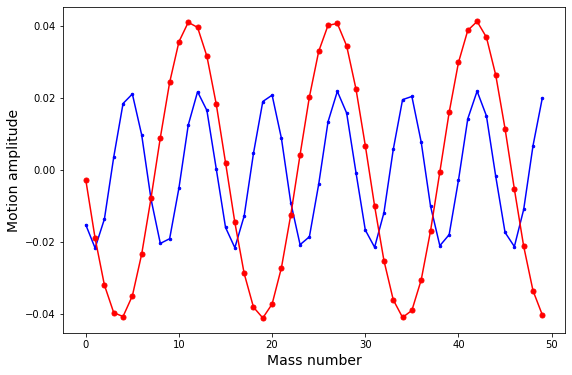

In [48]:
N = 50
m = 1.0
k = 6.0
C= 0.1
omega = 2.0
alpha = 2*k-m*omega*omega

A = np.zeros((N,N),dtype=float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha-k
A[N-1,N-1] = alpha-k

b=np.zeros(N,dtype=float)
b[0] = C

x1 = scipy.linalg.solve(A,b)

print(f"A:\n{A}")
print(f"b:\n{b}")

omega = 1.0
alpha = 2*k-m*omega*omega

A = np.zeros((N,N),dtype=float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha-k
A[N-1,N-1] = alpha-k

b=np.zeros(N,dtype=float)
b[0] = C

x2 = scipy.linalg.solve(A,b)
x3 = gauss_elim_pivot(A,b)
#print(x2)
#print(x3)

print(f"A:\n{A}")
print(f"b:\n{b}")

plt.figure(figsize=(9,6))
plt.plot(x1,"b.-", markersize=5)
plt.plot(x2,"r.-", markersize=10)
plt.xlabel("Mass number", fontsize=14)
plt.ylabel("Motion amplitude", fontsize=14)
plt.show()
plt.close()

The amplitude doubles and there are half as many waves when omega changes from 2.0 to 1.0.

<font color="blue"> **ANSWER:**</font>

#### Excercise 6

Use `scipy.linalg.solve_banded` to solve the mass spring problem again. You will have to study how the array used for this function *along each row only stores each diagonal band*. Since there are three bands, the array `ab` will need to be $(3,N)$.

- Print the banded-matrix array `ab`, and compare with the lecture example.
- Plot the displacement amplitudes, and compare with the previous result from above.

ab:
[[-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]
 [ 2.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
   8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
   8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  2.]
 [-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]]
b:
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


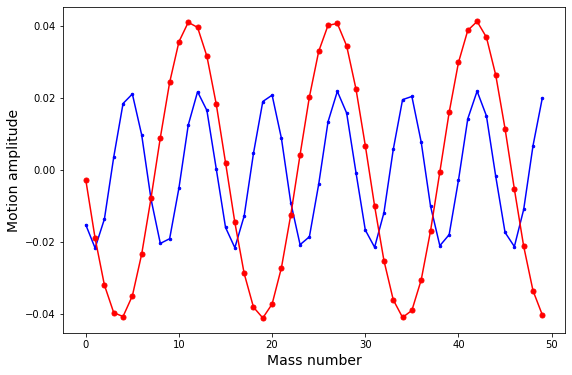

In [46]:
###Part 1

N = 50
m = 1.0
k = 6.0
C= 0.1
omega = 2.0
alpha = 2*k-m*omega*omega

ab = np.zeros((3,N),dtype=float)
ab[0,:] = -k
ab[1,:] = alpha
ab[1,0] = alpha-k
ab[1,N-1] = alpha-k
ab[2,:] = -k

b=np.zeros(N,dtype=float)
b[0] = C

vect1 = scipy.linalg.solve_banded( (1,1), ab, b)

print(f"ab:\n{ab}")
print(f"b:\n{b}")


###Part 2

omega = 1.0
alpha = 2*k-m*omega*omega

ab = np.zeros((3,N),dtype=float)
ab[0,:] = -k
ab[1,:] = alpha
ab[1,0] = alpha-k
ab[1,N-1] = alpha-k
ab[2,:] = -k

vect2 = scipy.linalg.solve_banded( (1,1), ab, b)

plt.figure(figsize=(9,6))
plt.plot(vect1,"b.-", markersize=5)
plt.plot(vect2,"r.-", markersize=10)
plt.xlabel("Mass number", fontsize=14)
plt.ylabel("Motion amplitude", fontsize=14)
plt.show()
plt.close()

<font color="blue">**ANSWER:**</font>

The matrix now only shows the three diagonals 3 x 50 rather than 50 x 50 with zeros and ' ... ' In part 2 the graph is identical to the graph of the previous question as expected/desired since we solved the same problem (albeit slightly more efficiently).